# <center> Analytic Report Project</center>

## Abstract
This report uses a friction dataset created by IBM data scients scientists to discover several factors affecting IBM employee's attrition and job satisfaction. Moreover, it also illustrates when they will resign by utilizing statistic method such as hypothesis test.

## Table of Contents
### [I.Introduction](#intro)
### [II.  Dataset Overview](#AnalII)
#### [1. Preparing Library](#AnalII1)
#### [2. Dataset Content](#AnalII2)
### [III. Attrition Feature Analization](#AnalIII)
#### [1. Attrition Statistical Overview](#AnalIII1)
#### [2. Attrition Hypothesis Test](#AnalIII2)
### [IV. JobSatisfaction Feature Analization](#AnalV)
#### [1. JobSatisfaction Statistical Overview](#AnalIV1)
#### [2. JobSatisfaction Hypothesis Test](#AnalIV2)
### [V. When Employee will resign](#AnaV)
### [VI. Conclusion](#conc)


## I.Introduction <a id = "intro">
    
[IBM HR Analytics Employee Attrition & Performance](https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset) is a pseudo dataset giving information about IBM human resources, and this report is going to apply some statistic methods to analyze several aspects of IBM's employees. Furthermore, the main goal is to explore three vital questions:
   1. What are key factors that are playing into current attrition rates? 
   2. What are key factors that are playing into current satisfaction rates? 
   3. When are employees leaving?
    
In order to address these problems, t-test, and f-test technique are utilized. 

The report include the [Dataset Overview](#AnalII) [Attrition Feature Analization](#AnalIII), [JobSatisfaction Feature Analization](#AnalV), and [Conclusion](#conc). Next session will given an general view of the dataset 

## II. Dataset Overview  <a id = "AnalII">

### 1. Preparing Library  <a id = "AnalII1">


Import libraries will be used in calculation

In [1]:
import pandas as pd
import numpy as np
import scipy as sci # use for ttest
import seaborn as sns
import matplotlib.pyplot as plt

### 2 Dataset Content <a id='AnalII2'>

Load the dataset (csv type) and show the first five samples. 

In [2]:
data = pd.read_csv('..\ibm-hr-analytics-attrition-dataset\WA_Fn-UseC_-HR-Employee-Attrition.csv')
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


There are some mean of numbers in categorical features need to be clear

**Education:** 1 'Below College', 2 'College', 3 'Bachelor', 4 'Master', 5 'Doctor'

**EnvironmentSatisfaction:** 1 'Low', 2 'Medium,' 3 'High', 4 'Very High'

**JobInvolvement:** 1 'Low', 2 'Medium', 3 'High', 4 'Very High'

**JobSatisfaction:** 1 'Low', 2 'Medium', 3 'High', 4 'Very High'

**PerformanceRating:** 1 'Low', 2 'Good', 3 'Excellent',, 4 'Outstanding'

**RelationshipSatisfaction:** 1 'Low', 2 'Medium', 3 'High', 4 'Very High'

**WorkLifeBalance:** 1 'Bad', 2 'Good', 3 'Better', 4 'Best

In [3]:
#--------------------------------------------------------------------------------------------------------------------#

Check 

       How many samples included in the dataset 

       Whether or not missing values existed in this dataset

       Types of each features

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

=> **There are 1470 samples, and each sample has full values (No missing values)**

=> **There are 26 "int64" samples and 9 "object" samples**

=> **Dataset includes 1470 employees and 35 features of them which are listed above**

In [5]:
#--------------------------------------------------------------------------------------------------------------------#

The list of 35 feature in this dataset

In [6]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [7]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Check unsual negative values and return their position in dataset

In [8]:
dataNum = data.select_dtypes(include = 'number')
# shoulde eliminate columns accepted negative value
rowsNumNeg, colsNumNeg = np.where(dataNum < 0)
posNumNeg = []
for i in range(len(rowsNumNeg)):
    posNumNeg.append([rowsNumNeg[i],colsNumNeg[i]])
posNumNeg

[]

### => Dataset has 1470 samples and 35 features with (26 Numerical and 9 object features)
### => No unsual negative values

## III. Attrition Feature Analization <a id='AnalIII'>

### 1 Attrition Statistical Overview <a id = 'AnalIII1'>

First of all, 'Attrition' needs to be observated.

**Attrition:** pepole who leave IBM company. There are only two values for this feature (Yes or No, dtype is object). From the observation, it can be conclude that 1233 employees choose 'No' and 237 emplyees choose 'Yes' accounting for 83.878% and 16.122% respectively.

In [9]:
data["Attrition"].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [10]:
#Attrition rate
attritionRate = data["Attrition"].value_counts() / data['Attrition'].shape[0]
attritionRate = attritionRate * 100
print("%.3f" % attritionRate[0] + "% is No")
print("%.3f" % attritionRate[1] + "% is Yes" )

83.878% is No
16.122% is Yes


**This report is going to opt for 5 features which are likely considered as important factors in 'Attrition' rate:**
   
    Numerical features: 
        
        1. 'YearsAtCompany'   : how many years employee worked in company.
        2. 'DistanceFromHome' : how much far from there home to work place.
        3. 'MonthlyIncome'    : sallary on a monthly basis.
    
    Categorical features: 
        4. 'Gender'           : their sex.
        5. 'OverTime'         : they work overtime or not.

In this section we just focus on these features; therefore, a sub dataset is created

In [11]:
dataQuestion1 = data[['Attrition','YearsAtCompany','DistanceFromHome','MonthlyIncome','Gender','OverTime']]

Because 'Attrition' is non numerical, it should be converted to numerical for calculating purposes (Yes = 1 and No = 0).

In [12]:
# must change object type to numerical type to calculate mean
#dataQuestion1.loc[:,'Attrition'] = np.where(data['Attrition'] == 'Yes',1,0) # Yes = 1 & No = 0
dataQuestion1['Attrition'] = data['Attrition'].apply(lambda x: 1 if (x=='Yes') else 0 ) # Yes = 1 & No = 0
dataQuestion1.head()

C:\Users\Annie Nguyen\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Attrition,YearsAtCompany,DistanceFromHome,MonthlyIncome,Gender,OverTime
0,1,6,1,5993,Female,Yes
1,0,10,8,5130,Male,No
2,1,0,2,2090,Male,Yes
3,0,8,3,2909,Female,Yes
4,0,2,2,3468,Male,No


Text(0.5, 1.0, 'Monthly Income')

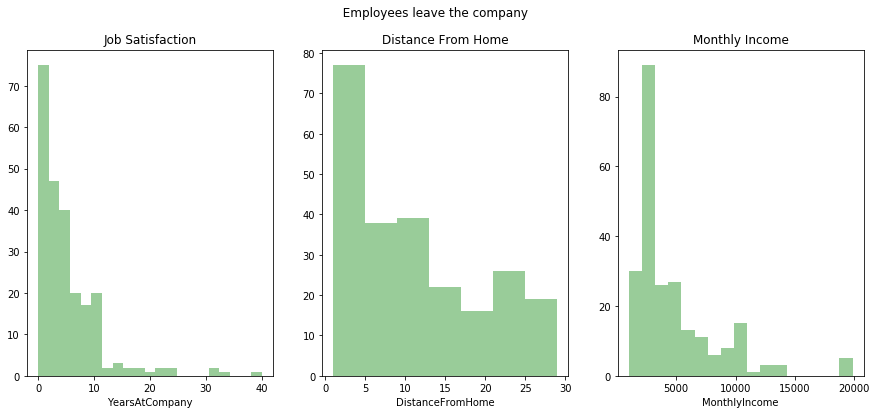

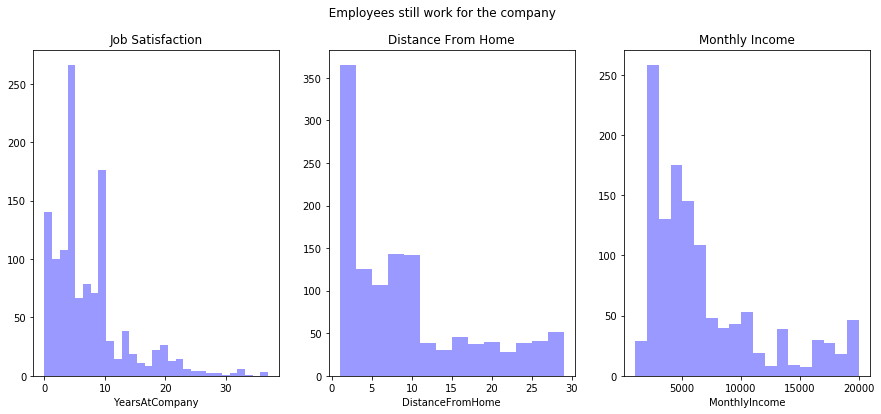

In [13]:
#subplot wiht 1 rows 3 cols and each figure size is 15x6 inches
fNumQuestion1Yes, axes = plt.subplots(nrows=1, ncols =3 , figsize=(15, 6))
# data, turnof line, color, title for sub figure
fNumQuestion1Yes.suptitle('  Employees leave the company')
sns.distplot(dataQuestion1[dataQuestion1['Attrition'] == 1 ]['YearsAtCompany'],
             kde=False, color="g", ax=axes[0]).set_title('Job Satisfaction')
sns.distplot(dataQuestion1[dataQuestion1['Attrition'] == 1 ]['DistanceFromHome'],
             kde=False, color="g", ax=axes[1]).set_title('Distance From Home')
sns.distplot(dataQuestion1[dataQuestion1['Attrition'] == 1 ]['MonthlyIncome'],
             kde=False, color="g", ax=axes[2]).set_title('Monthly Income')

fNumQuestion1No, axes = plt.subplots(nrows=1, ncols =3 , figsize=(15, 6))
fNumQuestion1No.suptitle('  Employees still work for the company')
sns.distplot(dataQuestion1[dataQuestion1['Attrition'] == 0 ]['YearsAtCompany'],
             kde=False, color="b", ax=axes[0]).set_title('Job Satisfaction')
sns.distplot(dataQuestion1[dataQuestion1['Attrition'] == 0 ]['DistanceFromHome'],
             kde=False, color="b", ax=axes[1]).set_title('Distance From Home')
sns.distplot(dataQuestion1[dataQuestion1['Attrition'] == 0 ]['MonthlyIncome'],
             kde=False, color="b", ax=axes[2]).set_title('Monthly Income')

**YearsAtCompany:** Most of people who quit their job, worked at company less than 5 years, and no-one quit job when they worked from 25 to 30 and approximately 35 years. . There might be differennce from who leave and work for company in YearsAtCompany.

**DistanceFromHome:** Most of people giving their job, seem to live near the company (1 to 10). Almost 30% of them are just 1. Moreover this is nearly the same as in still working for the company. However distance between 20 and 25 seem to different from each other.

**MonthlyIncome:** The two graphs dipict that there are no one resign in range from 15000 and under 20000,  

In [14]:
# Describe numerical data in statistical way  
dataQuestion1.describe(include=None) # include = None  The result will include all numerical columns.

,Attrition,YearsAtCompany,DistanceFromHome,MonthlyIncome
count,1470.000000,1470.000000,1470.000000,1470.000000
mean,0.161224,7.008163,9.192517,6502.931293
std,0.367863,6.126525,8.106864,4707.956783
min,0.000000,0.000000,1.000000,1009.000000
25%,0.000000,3.000000,2.000000,2911.000000
50%,0.000000,5.000000,7.000000,4919.000000
75%,0.000000,9.000000,14.000000,8379.000000
max,1.000000,40.000000,29.000000,19999.000000


Find variance for these factors

In [15]:
varQuestion1 = dataQuestion1.describe(include=None)
varQuestion1.iloc[2,:]**2

Attrition           1.353232e-01
YearsAtCompany      3.753431e+01
DistanceFromHome    6.572125e+01
MonthlyIncome       2.216486e+07
Name: std, dtype: float64

Means of each Numeric features of question 1 for each group of Attrition

In [16]:
dataQuestion1.groupby('Attrition').mean()

,YearsAtCompany,DistanceFromHome,MonthlyIncome
Attrition,,,
0,7.369019,8.915653,6832.739659
1,5.130802,10.632911,4787.092827


In [17]:
# Describe categorical data in statistical way  
dataQuestion1.describe(include='O') # include = [0]  To select pandas categorical columns

,Gender,OverTime
count,1470,1470
unique,2,2
top,Male,No
freq,882,1054


Gender and Overtime have two unique values and their top fequency is Male and No respectively

The average of each element of a certain categorical factor people choose Yes

In [18]:
#chooe categorical features 
cateFeat = dataQuestion1.select_dtypes(include='object')
# show mean of categorical feature with Attrition
for i in range(cateFeat.shape[1]):
    print(dataQuestion1.groupby(cateFeat.columns[i])['Attrition'].mean())
    print("\n")


Gender
Female    0.147959
Male      0.170068
Name: Attrition, dtype: float64


OverTime
No     0.104364
Yes    0.305288
Name: Attrition, dtype: float64




                                         Percentage of people leave company


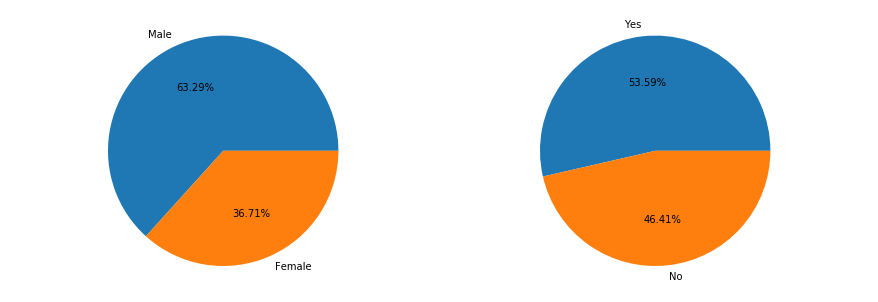

In [19]:
print('                                         Percentage of people leave company')
fig = plt.figure()
ax = fig.add_axes([0,0,1,1]) # [left, bottom, width, height] 
ax.axis('equal')
male = dataQuestion1[dataQuestion1['Attrition'] == 1 ]['Gender'].value_counts()['Male']
female = dataQuestion1[dataQuestion1['Attrition'] == 1 ]['Gender'].value_counts()['Female']
genderLable = ['Male','Female']
genderValCount = [male,female]
#The proportionate percentage is displayed inside the respective wedge with the help of autopct parameter
#which is set to %1.2f%.
ax.pie(genderValCount, labels = genderLable,autopct='%1.2f%%')

ax = fig.add_axes([1,0,1,1])
ax.axis('equal')
OTYes = dataQuestion1[dataQuestion1['Attrition'] == 1 ]['OverTime'].value_counts()['Yes']
OTNo = dataQuestion1[dataQuestion1['Attrition'] == 1 ]['OverTime'].value_counts()['No']
OTLable = ['Yes','No']
OTValCount = [OTYes,OTNo]
ax.pie(OTValCount, labels = OTLable,autopct='%1.2f%%')



plt.show()


From the observation of 'Attrition' and the 5 factors: <font color = 'red'> **(they are just the firts obsrvation from figures statistic values, it needs to be experienced hypothesis test to give more accuracy conclusions)** </font>

Numerical Features:

**=> 'YearsAtCompany' is integer number range from <font color = 'red'> 1 to 40 </font>. The mean and variance rating for YearsAtCompany are <font color = 'red'> 7.008 and 37.534 </font>. Moreover, it can show that people <font color = 'red'> spent less years at company tend to leave the company than the others </font>**

**=> 'DistanceFromHome' is integer number range from <font color = 'red'> 1 to 29 </font>. The mean and variance rating for the distance are <font color = 'red'> 9.193 and 65.721 </font>. Moreover, it can show that might be <font color = 'red'> people further from home tend to leave the company </font>**

**=> 'MonthlyIncome' is integer number range <font color = 'red'> from 1009 to 19999 </font>. The mean and variance rating for the income are <font color = 'red'> 6502.931 and 2216486 </font>. Moreover, it can show might be <font color = 'red'> people received low salary tend to leave the company </font>**


Categorical Features:

**=> 'Gender', is object including two values (Female and Male). It can show that <font color = 'red'> Male tend to leave the company </font>**

**=> 'OverTime' is object including two values (Yes and No). It can show that <font color = 'red'> people taking overtime tend to leave the company </font>**


### 2. Attrition Hypothesis Test <a id='AnalIII2'>

### Attrition vs YearsAtCompany

**Hypothesis:** YearsAtCompany affects Attrition
1.  Identity 
    - Populations: 

            Pop1: Number of years at the company of employees leaving the company .
        
            Pop2: Number of years at the company of employees who still work.
        
    - Distribution: Because two group of employees with number of years at the company, the distribution is Differences Between Means.

    - Data is continuos.
    
    - Sample size > 30, therefore distribution might be normal
    
 
2. State the null and research hypothesis 
 
     - H0: There are no diffrences in the years at company between employees quit job and do not.
 
     - H1: There are diffrences in the years at company between employees quit job and do not.
    

In [20]:
JobSatYesArray = dataQuestion1[dataQuestion1['Attrition'] == 1]['YearsAtCompany']
JobSatNoArray = dataQuestion1[dataQuestion1['Attrition'] == 0]['YearsAtCompany']
sci.stats.ttest_ind(JobSatYesArray,JobSatNoArray)

Ttest_indResult(statistic=-5.1963086670254235, pvalue=2.3188716103863033e-07)

**Assump alpha level is 0.05, pvalue < 0.05 => There is a statistically significant difference between the mean number of year at company of employees who leave and still work for company**

**=> group who leave company tent to have number of years at compnay lower than another**

In [21]:
#dataQuestion1 = data[['Attrition','JobSatisfaction','DistanceFromHome','MonthlyIncome','Gender','OverTime','Department']]

### Attrition vs DistanceFromHome

**Hypothesis:** DistanceFromHome affects Attrition
1.  Identity 
    - Populations: 

            Pop1: Distance from home of people who leaving the company.
        
            Pop2: Distance from home of people who still working in the company rate their sastisfaction.
        
    - Distribution: Because two group of distance from home of employees who leave and not, the distribution is Differences Between Means.

    - Data is continuos.
    
    - Sample size > 30, therefore distribution might be normal
    
 
2. State the null and research hypothesis 
 
     - H0: There are no diffrences in  distance from home between employees quit job and do not.
 
     - H1: There are diffrences in distance from home between employees quit job and do not.
    

In [22]:
DistYesArray = dataQuestion1[dataQuestion1['Attrition'] == 1]['DistanceFromHome']
DistNoArray = dataQuestion1[dataQuestion1['Attrition'] == 0]['DistanceFromHome']
sci.stats.ttest_ind(DistYesArray,DistNoArray)

Ttest_indResult(statistic=2.994708098265125, pvalue=0.0027930600802134266)

**Assump alpha level is 0.05, pvalue < 0.05 => There is a statistically significant difference between the mean of distance from of employees who leave and still work for company**

**=> group who leave company seem to live further than another**

In [23]:
#dataQuestion1 = data[['Attrition','YearsAtCompany','DistanceFromHome','MonthlyIncome','Gender','OverTime','Department']]

### Attrition vs MonthlyIncome

**Hypothesis:** MonthlyIncome affects Attrition
1.  Identity 
    - Populations: 

            Pop1: Montly income of people who leaving the company.
        
            Pop2: Montly income of of people who still working in the company rate their sastisfaction.
        
    - Distribution: Because two group of Montly income of employees who leave and not, the distribution is Differences Between Means.

    - Data is continuos.
    
    - Sample size > 30, therefore distribution might be normal
    
 
2. State the null and research hypothesis 
 
     - H0: There are no diffrences in montly income between employees quit job and do not.
 
     - H1: There are diffrences in montly income between employees quit job and do not.
    

In [24]:
MonIncYesArray = dataQuestion1[dataQuestion1['Attrition'] == 1]['MonthlyIncome']
MonIncNoArray = dataQuestion1[dataQuestion1['Attrition'] == 0]['MonthlyIncome']
sci.stats.ttest_ind(MonIncYesArray,MonIncNoArray)

Ttest_indResult(statistic=-6.203935765608938, pvalue=7.14736398535381e-10)

**Assump alpha level is 0.05, pvalue < 0.05 => There is a statistically significant difference between the mean of monthly income of employees who leave and still work for company**

**=> group who leave company seem to have lower income than another**

In [25]:
#dataQuestion1 = data[['Attrition','YearsAtCompany','DistanceFromHome','MonthlyIncome','Gender','OverTime','Department']]

### Attrition vs Gender

**Hypothesis:** Gender affects Attrition
1.  Identity 
    - Populations: 

            Pop1: Number of Male with attrition.
        
            Pop2: Number of Female with attrition.
        
    - Distribution: Because two group of employee's gender with attrition, the distribution is Differences Between Means.
    
    - Sample size > 30, therefore distribution might be normal
    
 
2. State the null and research hypothesis 
 
     - H0: There are no diffrences in number of Male and Female quit job.
 
     - H1: There are diffrences in number of Male and Female quit job.
    

In [26]:
MaleYesArray = dataQuestion1[dataQuestion1['Gender'] == 'Male']['Attrition']
FemaleYesArray = dataQuestion1[dataQuestion1['Gender'] == 'Female']['Attrition']
sci.stats.ttest_ind(MaleYesArray,FemaleYesArray)


Ttest_indResult(statistic=1.1289761152328313, pvalue=0.25909236414147996)

**Assump alpha level is 0.05, pvalue > 0.05 => Not enough evidence is available to reject H0 (74.1%).**

**=>Gender seems to does not affect Attrition rate**

### Attrition vs OverTime

**Hypothesis:** OverTime affects Attrition
1.  Identity 
    - Populations: 

            Pop1: Number people taking OverTime with attrition.
        
            Pop2: Number people who don not take OverTime with attrition.
        
    - Distribution: Because two group of employee's taking Overtime with attrition, the distribution is Differences Between Means.
    
    - Sample size > 30, therefore distribution might be normal
    
 
2. State the null and research hypothesis 
 
     - H0: There are no diffrences between employee who quit job, take ovetime and do not.
 
     - H1: There are diffrences between employee who quit job, take ovetime and do not.
    

In [27]:
OverTimeYesArray = dataQuestion1[dataQuestion1['OverTime'] == 'Yes']['Attrition']
NotOvetimeYesArray = dataQuestion1[dataQuestion1['OverTime'] == 'No']['Attrition']
sci.stats.ttest_ind(OverTimeYesArray,NotOvetimeYesArray)

Ttest_indResult(statistic=9.729155002966676, pvalue=1.0092540336563068e-21)

**Assump alpha level is 0.05, pvalue < 0.05 => There is a statistically significant difference between the employee take and do not take overitme with attrition**

**=> group who take overtime seem to leave more than another**

### => There are 4 over 5 factors affect Attrition


## IV. JobSatisfaction Feature Analization<a id='AnalV'>


### 1. JobSatisfaction Statistical Overview<a id='AnalIV1'>


First of all, 'JobSatisfaction' need to be observated.

**JobSatisfaction:** IBM employees sastisfy their job. There are four values for this feature (1, 2,3, 4 ,and dtype is int64), the larger number, the more sastisfaction. From the observation, it can be conclude that 280 employees choose 2, 289 choose 1, 442 choose 3, and 459 choose 4 accounting for 19.048%, 19.660%, 30.068%, and 31.224% respectively.

In [28]:
data['JobSatisfaction'].value_counts()

4    459
3    442
1    289
2    280
Name: JobSatisfaction, dtype: int64

In [29]:
data['JobSatisfaction'].value_counts()/data['JobSatisfaction'].shape[0]*100
#JobSatisfaction rate
JobSatisfactionRate = data["JobSatisfaction"].value_counts() / data['JobSatisfaction'].shape[0]
JobSatisfactionRate = JobSatisfactionRate * 100
for i in range(1,JobSatisfactionRate.shape[0]+1): # index 1 to 4
    print( "%d " %i + "is " + "%.3f" % JobSatisfactionRate[i]+"%" )


1 is 19.660%
2 is 19.048%
3 is 30.068%
4 is 31.224%


**This report is going to opt for 6 features which are likely considered as important factors in 'JobSatisfaction' rate:**
   
    Numerical features: 
        
        1. 'YearsInCurrentRole'   : Years in current role.
        2. 'Age'                  : How old they are.
        3. 'DistanceFromHome'     : Distance from home to company.
        4. 'MonthlyIncome'        : Frequency of business travel.
        5. 'YearsWithCurrManager' : Years with current manager.

In [30]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Get necessary feature for question 2.

In [31]:
dataQuestion2 = data[['JobSatisfaction', 'YearsInCurrentRole', 'Age', 'DistanceFromHome', 
                      'MonthlyIncome', 'YearsWithCurrManager']]

dataQuestion2.head()

,JobSatisfaction,YearsInCurrentRole,Age,DistanceFromHome,MonthlyIncome,YearsWithCurrManager
0,4,4,41,1,5993,5
1,2,7,49,8,5130,7
2,3,0,37,2,2090,0
3,3,7,33,3,2909,0
4,2,2,27,2,3468,2


In [32]:
# Describe numerical data in statistical way  
dataQuestion2.describe()

,JobSatisfaction,YearsInCurrentRole,Age,DistanceFromHome,MonthlyIncome,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,2.728571,4.229252,36.923810,9.192517,6502.931293,4.123129
std,1.102846,3.623137,9.135373,8.106864,4707.956783,3.568136
min,1.000000,0.000000,18.000000,1.000000,1009.000000,0.000000
25%,2.000000,2.000000,30.000000,2.000000,2911.000000,2.000000
50%,3.000000,3.000000,36.000000,7.000000,4919.000000,3.000000
75%,4.000000,7.000000,43.000000,14.000000,8379.000000,7.000000
max,4.000000,18.000000,60.000000,29.000000,19999.000000,17.000000


Find Numerical variance for these factors.

In [33]:
varQuestion2 = dataQuestion2.describe().iloc[2,:]
varQuestion2 = varQuestion2**2
varQuestion2

JobSatisfaction         1.216270e+00
YearsInCurrentRole      1.312712e+01
Age                     8.345505e+01
DistanceFromHome        6.572125e+01
MonthlyIncome           2.216486e+07
YearsWithCurrManager    1.273160e+01
Name: std, dtype: float64

Find means of each feature in each group of JobSatisfaction

In [34]:
dataQuestion2.groupby('JobSatisfaction').mean()

,YearsInCurrentRole,Age,DistanceFromHome,MonthlyIncome,YearsWithCurrManager
JobSatisfaction,,,,,
1,4.276817,36.916955,9.190311,6561.570934,4.384083
2,4.135714,36.985714,9.103571,6527.328571,4.075000
3,4.285068,37.022624,9.418552,6480.495475,4.033937
4,4.202614,36.795207,9.030501,6472.732026,4.074074


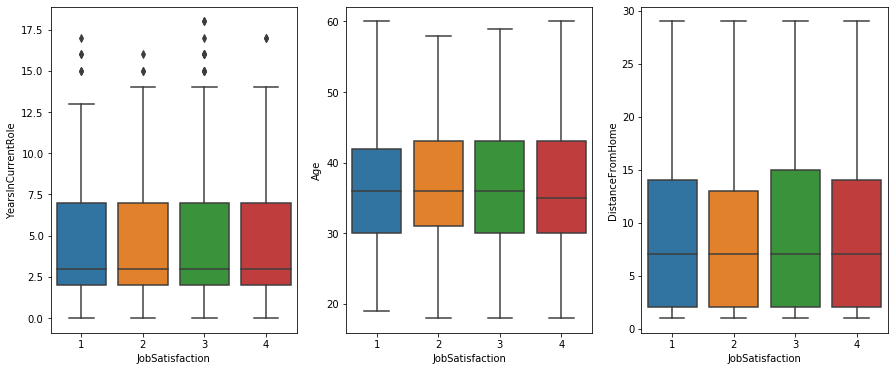

In [35]:
#subplot wiht 1 rows 3 cols and each figure size is 15x6 inches
fNumQuestion2, axes = plt.subplots(nrows=1, ncols =3 , figsize=(15, 6))
# data, turnof line, color, title for sub figure
#fNumQuestion2.suptitle('  Employees leave the company')
sns.boxplot(x="JobSatisfaction",y="YearsInCurrentRole",data=dataQuestion2,ax=axes[0])
sns.boxplot(x="JobSatisfaction",y="Age",data=dataQuestion2,ax=axes[1])
sns.boxplot(x="JobSatisfaction",y="DistanceFromHome",data=dataQuestion2,ax=axes[2])



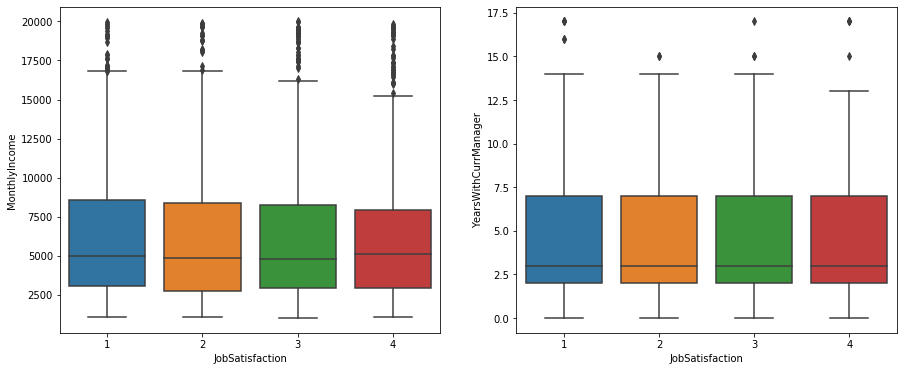

In [36]:
#subplot wiht 1 rows 32cols and each figure size is 15x6 inches
fNumQuestion22, axes = plt.subplots(nrows=1, ncols =2 , figsize=(15, 6))
# data, turnof line, color, title for sub figure
#fNumQuestion22.suptitle('  Employees leave the company')
sns.boxplot(x="JobSatisfaction",y="MonthlyIncome",data=dataQuestion2,ax=axes[0])
sns.boxplot(x="JobSatisfaction",y="YearsWithCurrManager",data=dataQuestion2,ax=axes[1])
#sns.boxplot(x="JobSatisfaction",y="DistanceFromHome",data=dataQuestion2,ax=axes[0],ay=axes[0])

From the observation of 'Jobsatisfaction' and the 5 factors: <font color = 'red'> **(they are just the firts obsrvation from figures statistic values, it needs to be experienced hypothesis test to give more accuracy conclusions)** </font>

Numerical Features:

**=> 'YearsInCurrentRole' is integer number range from <font color = 'red'> 0 to 18 </font>. The mean and variance for YearsInCurrentRole are <font color = 'red'> 4.229 and 13.127</font>. Moreover, it can show that there are no differences among means of YearsInCurrentRole with each Jobsatisfaction group**

**=> 'Age' is integer number range from <font color = 'red'> 18 to 60 </font>. The mean and variance for the distance are <font color = 'red'> 36.924 and 83.455 </font>. Moreover, it can show that there are no differences among means of Age with each Jobsatisfaction group**

**=> 'DistanceFromHome' is integer number range <font color = 'red'> from 1 to 29 </font>. The mean and variance  for the distance are <font color = 'red'> 9.193 and 65.721 </font>. Moreover, it can show might be no differences among means of DistanceFromHome with each Jobsatisfaction group**

**=> 'MonthlyIncome', is integer number range <font color = 'red'> from 1009 to 19999 </font>. The mean and variance for the MontlyIncome are <font color = 'red'> 6502.931 and 2216486 </font>. Moreover, it can show might be no differences among means of MonthlyIncome with each Jobsatisfaction group**

**=> YearsWithCurrManager', is integer number range <font color = 'red'> from 0 to 17 </font>. The mean and variance for the YearsWithCurrManager are <font color = 'red'> 4.123 and 12.731 </font>. Moreover, it can show might be no differences among means of YearsWithCurrManager with each Jobsatisfaction group**

### 2. JobSatisfaction Hypothesis Test<a id='AnalIV2'>

### JobSatisfaction vs YearsInCurrentRole

**Hypothesis:** YearsInCurrentRole affects JobSatisfaction
1.  Identity 
    - Populations: 

            Pop1: Number of years in current role when JobSatisfaction is 1.
        
            Pop2: Number of years in current role when JobSatisfaction is 2.
            
            Pop3: Number of years in current role when JobSatisfaction is 3.
            
            Pop4: Number of years in current role when JobSatisfaction is 4.
        
    - Distribution: Because of 4 groups of employee's JobSatisfaction with years in current role, one-way ANOVA is used.
    
    - Sample size > 30, therefore distribution might be normal
    
 
2. State the null and research hypothesis 
 
     - H0: There are no diffrences in 4 groups of JobSatisfaction in YearsInCurrentRole.
 
     - H1: There are diffrences in 4 groups of JobSatisfaction in YearsInCurrentRole.
    

In [37]:
WorkGroup1 = dataQuestion2[dataQuestion2['JobSatisfaction'] == 1]['YearsInCurrentRole']
WorkGroup2 = dataQuestion2[dataQuestion2['JobSatisfaction'] == 2]['YearsInCurrentRole']
WorkGroup3 = dataQuestion2[dataQuestion2['JobSatisfaction'] == 3]['YearsInCurrentRole']
WorkGroup4 = dataQuestion2[dataQuestion2['JobSatisfaction'] == 4]['YearsInCurrentRole']
sci.stats.f_oneway(WorkGroup1,WorkGroup2,WorkGroup3,WorkGroup4)

F_onewayResult(statistic=0.12182711023317545, pvalue=0.9472613160241014)

**Assump alpha level is 0.05, pvalue > 0.05 => Not enough evidence is available to reject H0 (6%).**

**=>YearsInCurrentRole seems to does not affect JobSatisfaction**

### JobSatisfaction vs Age

**Hypothesis:** Age affects JobSatisfaction
1.  Identity 
    - Populations: 

            Pop1: employee's age when JobSatisfaction is 1.
        
            Pop2: employee's age when JobSatisfaction is 2.
            
            Pop3: employee's age when JobSatisfaction is 3.
            
            Pop4: employee's age when JobSatisfaction is 4.
        
        
    - Distribution: Because of 4 groups of employee's JobSatisfaction  with different age, one-way ANOVA is used.
    
    - Sample size > 30, therefore distribution might be normal
    
 
2. State the null and research hypothesis 
 
     - H0: There are no diffrences in 4 groups of JobSatisfaction and Age.
 
     - H1: There are diffrences in 4 groups of JobSatisfaction and Age..
    

In [38]:
AgeGroup1 = dataQuestion2[dataQuestion2['JobSatisfaction'] == 1]['Age']
AgeGroup2 = dataQuestion2[dataQuestion2['JobSatisfaction'] == 2]['Age']
AgeGroup3 = dataQuestion2[dataQuestion2['JobSatisfaction'] == 3]['Age']
AgeGroup4 = dataQuestion2[dataQuestion2['JobSatisfaction'] == 4]['Age']
sci.stats.f_oneway(AgeGroup1,AgeGroup2,AgeGroup3,AgeGroup4)

F_onewayResult(statistic=0.051798411447326435, pvalue=0.9844403066163281)

**Assump alpha level is 0.05, pvalue > 0.05 => Not enough evidence is available to reject H0 (2%).**

**=>Age seems to does not affect JobSatisfaction**

### JobSatisfaction vs DistanceFromHome

**Hypothesis:** DistanceFromHome affects JobSatisfaction
1.  Identity 
    - Populations: 

            Pop1: employee's DistanceFromHome when JobSatisfaction is 1.
        
            Pop2: employee's DistanceFromHome when JobSatisfaction is 2.
            
            Pop3: employee's DistanceFromHome when JobSatisfaction is 3.
            
            Pop4: employee's DistanceFromHome when JobSatisfaction is 4.
        
        
    - Distribution: Because of 4 groups of employee's JobSatisfaction  with different DistanceFromHome, one-way ANOVA is used.
    
    - Sample size > 30, therefore distribution might be normal
    
 
2. State the null and research hypothesis 
 
     - H0: There are no diffrences in 4 groups of JobSatisfaction in DistanceFromHome.
 
     - H1: There are diffrences in 4 groups of JobSatisfaction in DistanceFromHome.
    

In [39]:
DistGroup1 = dataQuestion2[dataQuestion2['JobSatisfaction'] == 1]['DistanceFromHome']
DistGroup2 = dataQuestion2[dataQuestion2['JobSatisfaction'] == 2]['DistanceFromHome']
DistGroup3 = dataQuestion2[dataQuestion2['JobSatisfaction'] == 3]['DistanceFromHome']
DistGroup4 = dataQuestion2[dataQuestion2['JobSatisfaction'] == 4]['DistanceFromHome']
sci.stats.f_oneway(DistGroup1,DistGroup2,DistGroup3,DistGroup4)

F_onewayResult(statistic=0.18657749054436545, pvalue=0.9055666234307)

**Assump alpha level is 0.05, pvalue > 0.05 => Not enough evidence is available to reject H0 (10%).**

**=>DistanceFromHome seems to does not affect JobSatisfaction**

### JobSatisfaction vs MonthlyIncome

**Hypothesis:** MonthlyIncome affects JobSatisfaction
1.  Identity 
    - Populations: 

           
            Pop1: employee's MonthlyIncome when JobSatisfaction is 1.
        
            Pop2: employee's MonthlyIncome when JobSatisfaction is 2.
            
            Pop3: employee's MonthlyIncome when JobSatisfaction is 3.
            
            Pop4: employee's MonthlyIncome when JobSatisfaction is 4.
            
    - Distribution: Because of 4 groups of employee's JobSatisfaction with different MonthlyIncome, one-way ANOVA is used.
    
    - Sample size > 30, therefore distribution might be normal
    
 
2. State the null and research hypothesis 
 
     - H0: There are no diffrences in 4 groups of JobSatisfaction in MonthlyIncome.
 
     - H1: There are diffrences in 4 groups of JobSatisfaction in MonthlyIncome.
    

In [40]:
MonthlyGroup1 = dataQuestion2[dataQuestion2['JobSatisfaction'] == 1]['MonthlyIncome']
MonthlyGroup2 = dataQuestion2[dataQuestion2['JobSatisfaction'] == 2]['MonthlyIncome']
MonthlyGroup3 = dataQuestion2[dataQuestion2['JobSatisfaction'] == 3]['MonthlyIncome']
MonthlyGroup4 = dataQuestion2[dataQuestion2['JobSatisfaction'] == 4]['MonthlyIncome']
sci.stats.f_oneway(MonthlyGroup1,MonthlyGroup2,MonthlyGroup3,MonthlyGroup4)

F_onewayResult(statistic=0.027038829545482108, pvalue=0.9940001654548951)

**Assump alpha level is 0.05, pvalue > 0.05 => Not enough evidence is available to reject H0 (63%).**

**=>MonthlyIncome seems to does not affect JobSatisfaction**

### JobSatisfaction vs YearsWithCurrManager

**Hypothesis:** YearsWithCurrManager affects JobSatisfaction
1.  Identity 
    - Populations: 

            Pop1: employee's YearsWithCurrManager when JobSatisfaction is 1.
        
            Pop2: employee's YearsWithCurrManager when JobSatisfaction is 2.
            
            Pop3: employee's YearsWithCurrManager when JobSatisfaction is 3.
            
            Pop4: employee's YearsWithCurrManager when JobSatisfaction is 4.
           
    - Distribution: Because of 4 groups of employee's JobSatisfaction with different YearsWithCurrManager, one-way ANOVA is used.
    
    - Sample size > 30, therefore distribution might be normal
    
 
2. State the null and research hypothesis 
 
     - H0: There are no diffrences in JobSatisfaction in YearsWithCurrManager.
 
     - H1: There are diffrences in JobSatisfaction in YearsWithCurrManager.
    

In [41]:
YWCMGroup1 = dataQuestion2[dataQuestion2['JobSatisfaction'] == 1]['YearsWithCurrManager']
YWCMGroup2 = dataQuestion2[dataQuestion2['JobSatisfaction'] == 2]['YearsWithCurrManager']
YWCMGroup3 = dataQuestion2[dataQuestion2['JobSatisfaction'] == 3]['YearsWithCurrManager']
YWCMGroup4 = dataQuestion2[dataQuestion2['JobSatisfaction'] == 4]['YearsWithCurrManager']
sci.stats.f_oneway(YWCMGroup1,YWCMGroup2,YWCMGroup3,YWCMGroup4)

F_onewayResult(statistic=0.6527513652785619, pvalue=0.5812504044357087)

**Assump alpha level is 0.05, pvalue > 0.05 => Not enough evidence is available to reject H0 (52%).**

**=>YearsWithCurrManager seems to does not affect JobSatisfaction**

### => 5 chosen factors cannot affect JobSatisfaction

## V. When employee will resign <a id = AnaV>


From [the previous statistical tests](#AnalIII2), it illustrate that there are four factors considered as affecting to decision of quiting job.
    
    1. The number of years at company can affect attrition rate, the lower years at company, the greater attrition rate. Moreover, the most number of employees who quit job when they worked at company for 1 year.
    
    2. The employees who leave company live further than the others. However, the most number of employees who leave the company live the company with distance ranging from 1 to 10
    
    3. The lower income employees tend to quit, especially those who have income below 5000, and no one leave company with icome between 15000 and 20000
    
    4. The group who take overtime seem to leave more than another, with 53.59% of resigning is ovetime. 
    


## IV. Conclusions  <a id = 'conc'> 

From the observation and visualization above, the report indicate sevaral essential points:

There are 5 features are chosen to  find what features can affect to attrition rate : YearsAtCompany, DistanceFromHome, MonthlyIncome, Gender, and Overtime.
    
- **YearsAtCompany:** There is a statistically significant difference between the mean number of year at company of employees who leave and still work for company. Empolyee leave company tend to have less years at company than who did not. Moreover, the most number of employees who quit job when they worked at company for 1 year.

- **DistanceFromHome:** People who live far away from company intent to quit job more than who are not. However, Most of people giving up their job, seem to live near the company (1 to 10). Almost 30% of them are just 1. Moreover this is nearly the same as in still working for the company. However distance between 20 and 25 seem to different from each other.

-  **MonthlyIncome:** The less monthly income the more chance they leave the company. Moreove, the two graphs dipict that there is no-one resign in range from 15000 and under 20000.
  
-  **OverTime:** This is the last factors in 5 factors can affect attrtion rate. Base on the test, it can confirm that people who take over time seem to have more probability to resign.

-  **Gender**: This is the only one factor in 5 opted factor does not affect the attrition rate although almost 63% of employee leaving are Male.

##### => There are 4 out of 5 factors likely affect the attrition rate <font color='red'>(YearsAtCompany, DistanceFromHome, MonthlyIncome, OverTime)</font>.

For the job satisfaction, 5 factors have been chosen to find the relationship between them and job satisfaction. Unfortunately, it cannot be under the influence of all these factors. 

- **YearsInCurrentRole:** from the Anova test it cannot make a conclusion that job satisfaction is affected by it becasue there are not enough evidence. 

- **Age, DistanceFromHome, MonthlyIncome, and YearsWithCurrManager:** also give the same result as YearsInCurrentRole. The do not provide sufficient evidence to claim that they affect job satisfaction feature.  

##### => There are 5 out of 5 factors cannot affect the attrition rate <font color='red'>(YearsInCurrentRole, Age, DistanceFromHome, MonthlyIncome, and YearsWithCurrManager ).</font>

##### => There is a noticeable point in job satisfaction because the lower rate in satisfaction, the higher chance to leave job. Therefore, can consider as job satisfaction affected by attrition.


In [42]:
dataQuestion1.columns[1:]
dataQuestion2.columns[[1,2,4]]
feaCon = dataQuestion1.columns[1:].tolist() + dataQuestion2.columns[[1,2,4]].tolist()
feaCon
samCon = [['t-test','t-test','t-test','t-test','t-test', '', '', ''],
          ['','f-test','','','f-test','f-test','f-test','f-test']]
pd.DataFrame(samCon, columns = feaCon, index = ['Question1','Question2'])

,YearsAtCompany,DistanceFromHome,MonthlyIncome,Gender,OverTime,YearsInCurrentRole,Age,MonthlyIncome
Question1,t-test,t-test,t-test,t-test,t-test,,,
Question2,,f-test,,,f-test,f-test,f-test,f-test
